In [ ]:
#Changing working directory
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

/content


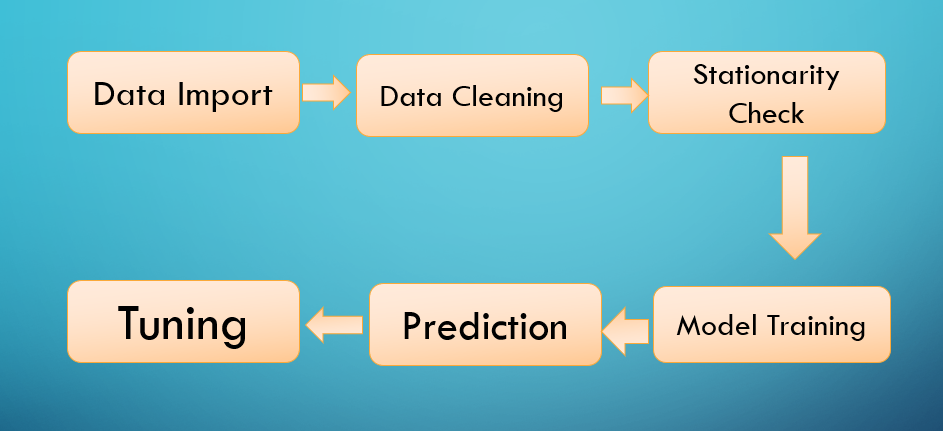

In [ ]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data


Incase you want to import directly from kaggle use this code, else download from Kaggle and upload

In [ ]:
! pip install kaggle              #Install kaggle.UPLOAD your kaggle.json into colab
! mkdir ~/.kaggle                 #Make a directory named “.kaggle”
! cp kaggle.json ~/.kaggle/       #Copy the “kaggle.json” into this new directory
! chmod 600 ~/.kaggle/kaggle.json #Allocate the required permission for this file
! kaggle datasets download berkeleyearth/climate-change-earth-surface-temperature-data


mkdir: cannot create directory ‘/root/.kaggle’: File exists
 77% 65.0M/84.7M [00:00<00:00, 166MB/s]
100% 84.7M/84.7M [00:00<00:00, 175MB/s]


In [ ]:
!unzip climate-change-earth-surface-temperature-data.zip

Archive:  climate-change-earth-surface-temperature-data.zip
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  


Starting the exercise

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
TempData = pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')
TempData.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
TempData.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'City',
       'Country', 'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
TempData.Country.unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [ ]:
#Data Cleaning
TempData = TempData.dropna()

In [ ]:
df_Denamrk = TempData[TempData.Country == "Denmark"]

In [ ]:
df_Denamrk.index = pd.to_datetime(df_Denamrk.dt)

In [ ]:
df_Denamrk = df_Denamrk.drop(['dt','AverageTemperatureUncertainty'], axis=1)

In [ ]:
df_Denamrk.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


Create Time Series

In [ ]:
ts = df_Denamrk['AverageTemperature']
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     6.026
2013-05-01    12.774
2013-06-01    15.685
2013-07-01    18.735
2013-08-01    18.067
Name: AverageTemperature, Length: 12664, dtype: float64

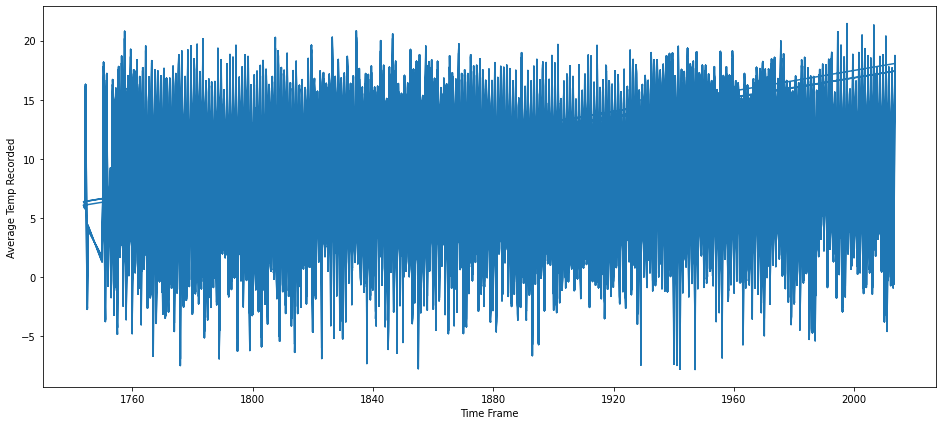

In [ ]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)

In [ ]:
# Perform Augmented Dickey-Fuller test:
# ADF Test - nul hypothesis - non-stationary - if p-value < 5% reject null hypothesis
adfuller_result = adfuller(ts, autolag='AIC')


In [ ]:
print(f'ADF Statistic: {adfuller_result[0]}')

ADF Statistic: -14.764430391800643


In [ ]:
print(f'p-value: {adfuller_result[1]}')

p-value: 2.374697045635644e-27


In [ ]:
for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

Critial Values:
   1%, -3.430868192869495
Critial Values:
   5%, -2.86176901566292
Critial Values:
   10%, -2.566891900059256


In [ ]:
#First model
newmodel = ARMA(ts,order=(1,1))

In [ ]:
results = newmodel.fit()

In [ ]:
predictions = results.predict('01/01/1990', '01/01/1991')

In [ ]:
actuals = df_Denamrk['01/01/1990': '01/01/1991']['AverageTemperature'][0:13]

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.812791


In [ ]:
import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(ts,order=parameters)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - AIC:83922.21129983963
ARMA(0, 1) - AIC:72682.79463953717
ARMA(0, 3) - AIC:63785.44572705185
ARMA(1, 0) - AIC:69020.31146792989
ARMA(1, 1) - AIC:65268.10421609773
ARMA(1, 2) - AIC:63179.84801382784
ARMA(1, 3) - AIC:66639.60428407836
ARMA(2, 0) - AIC:60366.309092605974
ARMA(2, 2) - AIC:52219.29609188337
ARMA(2, 3) - AIC:50711.73511055427
ARMA(3, 0) - AIC:56175.94555217969
ARMA(3, 1) - AIC:53338.63499200772
ARMA(3, 2) - AIC:50395.10131258276
ARMA(3, 3) - AIC:50388.85355013776


In [ ]:
predictions = results.predict('01/01/1990', '01/01/1991')

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

MAE: 1.494435
